<a href="https://colab.research.google.com/github/EvelinneG/ETL/blob/main/Practica4_VariablesIndependientes_REAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Leer el archivo como archivo de texto separado por tabulaciones
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Variables /Ramirez_Galindo01.xls', sep='\t')

# Ver las primeras filas
df.head()

,Time,Link (<51),RAW,Delta (0.5-2.75 Hz),Theta(3.5-6.75 Hz),Low Alpha (7.5-9.25 Hz),High Alpha (10-11.75 Hz),Low Beta (13-16.75 Hz),High Beta (18-29.75 Hz),Low Gamma (31-39.75 Hz),High Gamma (41-49.75 Hz),Atte (%),Med (%),Flag
0,"1743709424,17959",200,56,0,0,0,0,0,0,0,0,0,0,a
1,"1743709424,1806",200,56,0,0,0,0,0,0,0,0,0,0,a
2,"1743709424,1806",200,56,0,0,0,0,0,0,0,0,0,0,a
3,"1743709424,1806",200,56,0,0,0,0,0,0,0,0,0,0,a
4,"1743709424,1806",200,56,0,0,0,0,0,0,0,0,0,0,a


# **PRUEBA 1**

# Filtrar por Link <51

In [3]:
dfc = df.copy()
df_filtrado = dfc[dfc['Link (<51)'] < 51].copy()

df_filtrado.head()

,Time,Link (<51),RAW,Delta (0.5-2.75 Hz),Theta(3.5-6.75 Hz),Low Alpha (7.5-9.25 Hz),High Alpha (10-11.75 Hz),Low Beta (13-16.75 Hz),High Beta (18-29.75 Hz),Low Gamma (31-39.75 Hz),High Gamma (41-49.75 Hz),Atte (%),Med (%),Flag
485,"1743709424,50824",25,240,1998174,548802,23514,123028,217373,190139,48953,34013,0,0,a
486,"1743709424,50874",25,298,1998174,548802,23514,123028,217373,190139,48953,34013,0,0,a
487,"1743709424,50874",25,253,1998174,548802,23514,123028,217373,190139,48953,34013,0,0,a
488,"1743709424,50874",25,278,1998174,548802,23514,123028,217373,190139,48953,34013,0,0,a
489,"1743709424,50874",25,402,1998174,548802,23514,123028,217373,190139,48953,34013,0,0,a


# Calculo manual

**Medias**

In [4]:
mean_x = df_filtrado['Theta(3.5-6.75 Hz)'].mean()
mean_y = df_filtrado['High Beta (18-29.75 Hz)'].mean()
print(f"\n🔹 Media de Theta (X̄): {mean_x}")
print(f"🔹 Media de High Beta (Ȳ): {mean_y}")


🔹 Media de Theta (X̄): 239038.51077013867
🔹 Media de High Beta (Ȳ): 49319.33579226911


**Terminos medios**

In [5]:
df_filtrado['X-X̄'] = df_filtrado['Theta(3.5-6.75 Hz)'] - mean_x
df_filtrado['Y-Ȳ'] = df_filtrado['High Beta (18-29.75 Hz)'] - mean_y
df_filtrado['(X-X̄)(Y-Ȳ)'] = df_filtrado['X-X̄'] * df_filtrado['Y-Ȳ']
df_filtrado['(X-X̄)²'] = df_filtrado['X-X̄']**2
df_filtrado['(Y-Ȳ)²'] = df_filtrado['Y-Ȳ']**2

print("\n📊 Tabla con cálculos intermedios:")
print(df_filtrado[['Theta(3.5-6.75 Hz)', 'High Beta (18-29.75 Hz)', 'X-X̄', 'Y-Ȳ', '(X-X̄)(Y-Ȳ)', '(X-X̄)²', '(Y-Ȳ)²']])


📊 Tabla con cálculos intermedios:
       Theta(3.5-6.75 Hz)  High Beta (18-29.75 Hz)          X-X̄  \
485                548802                   190139  309763.48923   
486                548802                   190139  309763.48923   
487                548802                   190139  309763.48923   
488                548802                   190139  309763.48923   
489                548802                   190139  309763.48923   
...                   ...                      ...           ...   
28616              147261                    21761  -91777.51077   
28617              147261                    21761  -91777.51077   
28618              147261                    21761  -91777.51077   
28619              147261                    21761  -91777.51077   
28620              147261                    21761  -91777.51077   

                 Y-Ȳ   (X-X̄)(Y-Ȳ)       (X-X̄)²        (Y-Ȳ)²  
485    140819.664208  4.362079e+10  9.595342e+10  1.983018e+10  
486    140819.6642

**Sumatorias**

In [6]:
numerator = df_filtrado['(X-X̄)(Y-Ȳ)'].sum()
denominator = (df_filtrado['(X-X̄)²'].sum() * df_filtrado['(Y-Ȳ)²'].sum())**0.5
r_manual = numerator / denominator

print(f"\n🔍 Resultado Manual:")
print(f"Numerador (Covarianza): {numerator}")
print(f"Denominador: {denominator}")
print(f"Coeficiente de Pearson (r): {r_manual:.2f}")


🔍 Resultado Manual:
Numerador (Covarianza): 494880140430405.94
Denominador: 641481416782034.5
Coeficiente de Pearson (r): 0.77


# Verificacion con librerias

In [7]:
from scipy.stats import pearsonr
r_lib, p_value = pearsonr(df_filtrado['Theta(3.5-6.75 Hz)'], df_filtrado['High Beta (18-29.75 Hz)'])
print("\n✅ Verificación con SciPy:")
print(f"Coeficiente de Pearson: {r_lib:.2f}")
print(f"Valor-p: {p_value:.4f} (significativo si < 0.05)")


✅ Verificación con SciPy:
Coeficiente de Pearson: 0.77
Valor-p: 0.0000 (significativo si < 0.05)


# Visualizacion

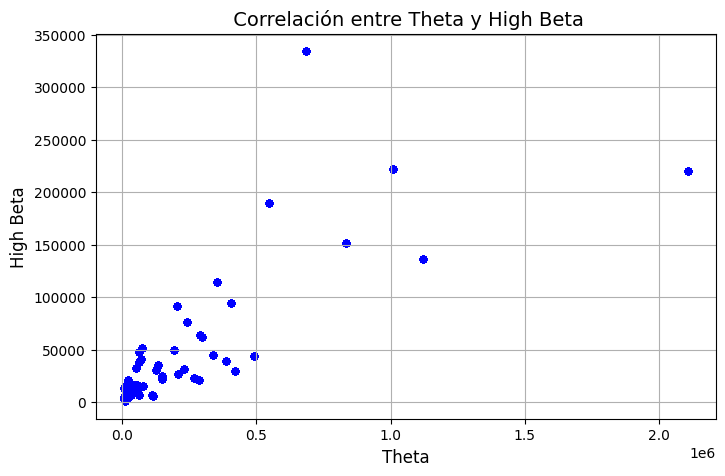

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(df_filtrado['Theta(3.5-6.75 Hz)'], df_filtrado['High Beta (18-29.75 Hz)'], color='blue', s=20)
plt.title(' Correlación entre Theta y High Beta', fontsize=14)
plt.xlabel('Theta', fontsize=12)
plt.ylabel('High Beta', fontsize=12)
plt.grid(True)
plt.show()

# Gráfico de dispersión Calculando la línea de regresión lineal (tendencia)

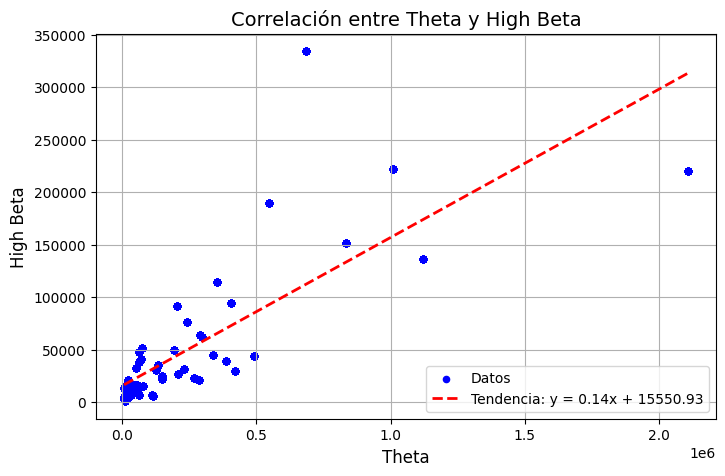

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(df_filtrado['Theta(3.5-6.75 Hz)'], df_filtrado['High Beta (18-29.75 Hz)'], color='blue', s=20, label='Datos')

m, b = np.polyfit(df_filtrado['Theta(3.5-6.75 Hz)'], df_filtrado['High Beta (18-29.75 Hz)'], 1)  # 1 = grado lineal (y = mx + b)
x_vals = np.sort(df_filtrado['Theta(3.5-6.75 Hz)'])
y_vals = m * x_vals + b
plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=2, label=f'Tendencia: y = {m:.2f}x + {b:.2f}')

# Personalización
plt.title('Correlación entre Theta y High Beta', fontsize=14)
plt.xlabel('Theta', fontsize=12)
plt.ylabel('High Beta', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Interpretacion

In [10]:
print("\n💡 Interpretación:")
if abs(r_manual) > 0.7:
    print("Correlación fuerte (🔵 Relación lineal clara).")
elif abs(r_manual) > 0.3:
    print("Correlación moderada (🟡 Relación parcial).")
else:
    print("Correlación débil o nula (🔴 Sin relación lineal).")


💡 Interpretación:
Correlación fuerte (🔵 Relación lineal clara).


# **PRUEBA 2**

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Variables /Ramirez_Galindo02.xls', sep='\t')

df.head()

,Time,Link (<51),RAW,Delta (0.5-2.75 Hz),Theta(3.5-6.75 Hz),Low Alpha (7.5-9.25 Hz),High Alpha (10-11.75 Hz),Low Beta (13-16.75 Hz),High Beta (18-29.75 Hz),Low Gamma (31-39.75 Hz),High Gamma (41-49.75 Hz),Atte (%),Med (%),Flag
0,"1743709500,15424",200,55,0,0,0,0,0,0,0,0,0,0,a
1,"1743709500,15424",200,56,0,0,0,0,0,0,0,0,0,0,a
2,"1743709500,15424",200,56,0,0,0,0,0,0,0,0,0,0,a
3,"1743709500,15424",200,56,0,0,0,0,0,0,0,0,0,0,a
4,"1743709500,15424",200,56,0,0,0,0,0,0,0,0,0,0,a


# Filtrar por Link <51

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Variables /Ramirez_Galindo02.xls', sep='\t')
dfc2 = df.copy()  # Define dfc2 by copying df
df_filtrado2 = dfc2[dfc2['Link (<51)'] < 51].copy()
df_filtrado2.head()

,Time,Link (<51),RAW,Delta (0.5-2.75 Hz),Theta(3.5-6.75 Hz),Low Alpha (7.5-9.25 Hz),High Alpha (10-11.75 Hz),Low Beta (13-16.75 Hz),High Beta (18-29.75 Hz),Low Gamma (31-39.75 Hz),High Gamma (41-49.75 Hz),Atte (%),Med (%),Flag
453,"1743709500,48576",25,-134,224769,193488,20298,14195,29033,39928,10024,5328,0,0,a
454,"1743709500,48576",25,-129,224769,193488,20298,14195,29033,39928,10024,5328,0,0,a
455,"1743709500,48576",25,-118,224769,193488,20298,14195,29033,39928,10024,5328,0,0,a
456,"1743709500,48576",25,-102,224769,193488,20298,14195,29033,39928,10024,5328,0,0,a
457,"1743709500,48576",25,-91,224769,193488,20298,14195,29033,39928,10024,5328,0,0,a


# Calculo manual

**Medias**

In [14]:
# from ipython-input-0-d835f2ec8255
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Variables /Ramirez_Galindo02.xls', sep='\t')
dfc2 = df.copy()  # Define dfc2 by copying df
df_filtrado2 = dfc2[dfc2['Link (<51)'] < 51].copy()
df_filtrado2.head()
# Add this line to verify df_filtrado2 is created
print("df_filtrado2 created successfully:")
print(df_filtrado2.head())

# from ipython-input-13-d835f2ec8255
mean_x2 = df_filtrado2['Theta(3.5-6.75 Hz)'].mean()
mean_y2 = df_filtrado2['High Beta (18-29.75 Hz)'].mean()
print(f"\n🔹 Media de Theta (X̄): {mean_x2}")
print(f"🔹 Media de High Beta (Ȳ): {mean_y2}")

df_filtrado2 created successfully:
                 Time  Link (<51)  RAW  Delta (0.5-2.75 Hz)  \
453  1743709500,48576          25 -134               224769   
454  1743709500,48576          25 -129               224769   
455  1743709500,48576          25 -118               224769   
456  1743709500,48576          25 -102               224769   
457  1743709500,48576          25  -91               224769   

     Theta(3.5-6.75 Hz)  Low Alpha (7.5-9.25 Hz)  High Alpha (10-11.75 Hz)  \
453              193488                    20298                     14195   
454              193488                    20298                     14195   
455              193488                    20298                     14195   
456              193488                    20298                     14195   
457              193488                    20298                     14195   

     Low Beta (13-16.75 Hz)  High Beta (18-29.75 Hz)  Low Gamma (31-39.75 Hz)  \
453                   29033         

**Terminos medios**

In [15]:
df_filtrado2['X-X̄'] = df_filtrado2['Theta(3.5-6.75 Hz)'] - mean_x2
df_filtrado2['Y-Ȳ'] = df_filtrado2['High Beta (18-29.75 Hz)'] - mean_y2
df_filtrado2['(X-X̄)(Y-Ȳ)'] = df_filtrado2['X-X̄'] * df_filtrado2['Y-Ȳ']
df_filtrado2['(X-X̄)²'] = df_filtrado2['X-X̄']**2
df_filtrado2['(Y-Ȳ)²'] = df_filtrado2['Y-Ȳ']**2

print("\n📊 Tabla con cálculos intermedios:")
print(df_filtrado2[['Theta(3.5-6.75 Hz)', 'High Beta (18-29.75 Hz)', 'X-X̄', 'Y-Ȳ', '(X-X̄)(Y-Ȳ)', '(X-X̄)²', '(Y-Ȳ)²']])


📊 Tabla con cálculos intermedios:
       Theta(3.5-6.75 Hz)  High Beta (18-29.75 Hz)           X-X̄  \
453                193488                    39928  -75100.866455   
454                193488                    39928  -75100.866455   
455                193488                    39928  -75100.866455   
456                193488                    39928  -75100.866455   
457                193488                    39928  -75100.866455   
...                   ...                      ...            ...   
28858               80080                    15413 -188508.866455   
28859               80080                    15413 -188508.866455   
28860               80080                    15413 -188508.866455   
28861               80080                    15413 -188508.866455   
28862               80080                    15413 -188508.866455   

                Y-Ȳ   (X-X̄)(Y-Ȳ)       (X-X̄)²        (Y-Ȳ)²  
453     3362.767969 -2.525468e+08  5.640140e+09  1.130821e+07  
454     

**Sumatorias**

In [16]:
numerator2 = df_filtrado2['(X-X̄)(Y-Ȳ)'].sum()
denominator2 = (df_filtrado2['(X-X̄)²'].sum() * df_filtrado2['(Y-Ȳ)²'].sum())**0.5
r_manual2 = numerator2 / denominator2

print(f"\n🔍 Resultado Manual:")
print(f"Numerador (Covarianza): {numerator2}")
print(f"Denominador: {denominator2}")
print(f"Coeficiente de Pearson (r): {r_manual2:.2f}")


🔍 Resultado Manual:
Numerador (Covarianza): 163646666263728.34
Denominador: 322496610603145.56
Coeficiente de Pearson (r): 0.51


# Verificacion con librerias

In [17]:
from scipy.stats import pearsonr
r_lib2, p_value2 = pearsonr(df_filtrado2['Theta(3.5-6.75 Hz)'], df_filtrado2['High Beta (18-29.75 Hz)'])
print("\n✅ Verificación con SciPy:")
print(f"Coeficiente de Pearson: {r_lib2:.2f}")
print(f"Valor-p: {p_value2:.4f} (significativo si < 0.05)")


✅ Verificación con SciPy:
Coeficiente de Pearson: 0.51
Valor-p: 0.0000 (significativo si < 0.05)


# Visualizacion

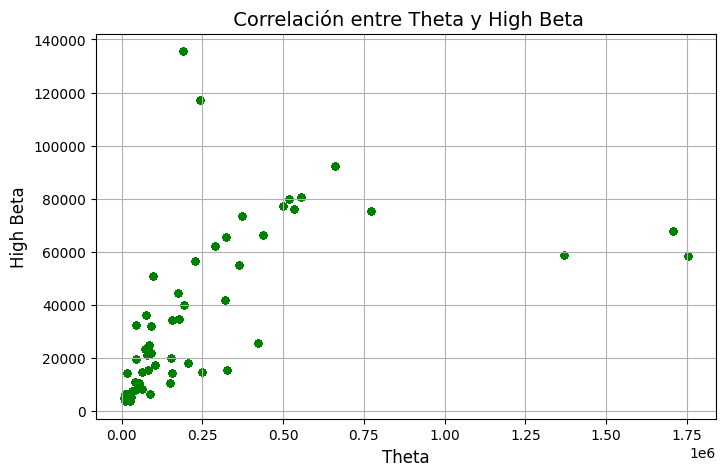

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(df_filtrado2['Theta(3.5-6.75 Hz)'], df_filtrado2['High Beta (18-29.75 Hz)'], color='green', s=20)
plt.title(' Correlación entre Theta y High Beta', fontsize=14)
plt.xlabel('Theta', fontsize=12)
plt.ylabel('High Beta', fontsize=12)
plt.grid(True)
plt.show()

# Gráfico de dispersión Calculando la línea de regresión lineal (tendencia)

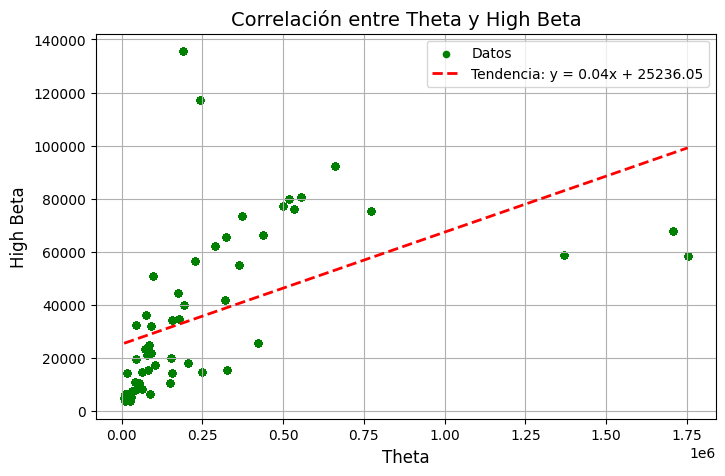

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(df_filtrado2['Theta(3.5-6.75 Hz)'], df_filtrado2['High Beta (18-29.75 Hz)'], color='green', s=20, label='Datos')

m2, b2 = np.polyfit(df_filtrado2['Theta(3.5-6.75 Hz)'], df_filtrado2['High Beta (18-29.75 Hz)'], 1)  # 1 = grado lineal (y = mx + b)
x2_vals = np.sort(df_filtrado2['Theta(3.5-6.75 Hz)'])
y2_vals = m2 * x2_vals + b2
plt.plot(x2_vals, y2_vals, color='red', linestyle='--', linewidth=2, label=f'Tendencia: y = {m2:.2f}x + {b2:.2f}')

# Personalización
plt.title('Correlación entre Theta y High Beta', fontsize=14)
plt.xlabel('Theta', fontsize=12)
plt.ylabel('High Beta', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Interpretacion

In [20]:
print("\n💡 Interpretación:")
if abs(r_manual2) > 0.7:
    print("Correlación fuerte (🔵 Relación lineal clara).")
elif abs(r_manual2) > 0.3:
    print("Correlación moderada (🟡 Relación parcial).")
else:
    print("Correlación débil o nula (🔴 Sin relación lineal).")


💡 Interpretación:
Correlación moderada (🟡 Relación parcial).


# **PRUEBA 3**

In [21]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Variables /Ramirez_Galindo03.xls', sep='\t')

df.head()

,Time,Link (<51),RAW,Delta (0.5-2.75 Hz),Theta(3.5-6.75 Hz),Low Alpha (7.5-9.25 Hz),High Alpha (10-11.75 Hz),Low Beta (13-16.75 Hz),High Beta (18-29.75 Hz),Low Gamma (31-39.75 Hz),High Gamma (41-49.75 Hz),Atte (%),Med (%),Flag
0,"1743709579,11302",200,56,0,0,0,0,0,0,0,0,0,0,a
1,"1743709579,11302",200,56,0,0,0,0,0,0,0,0,0,0,a
2,"1743709579,11302",200,56,0,0,0,0,0,0,0,0,0,0,a
3,"1743709579,11302",200,56,0,0,0,0,0,0,0,0,0,0,a
4,"1743709579,11302",200,56,0,0,0,0,0,0,0,0,0,0,a


# Filtrar por Link <51

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Variables /Ramirez_Galindo03.xls', sep='\t')
dfc3 = df.copy() # Create a copy of df and assign it to dfc3
df_filtrado3 = dfc3[dfc3['Link (<51)'] < 51].copy()

df_filtrado3.head()

,Time,Link (<51),RAW,Delta (0.5-2.75 Hz),Theta(3.5-6.75 Hz),Low Alpha (7.5-9.25 Hz),High Alpha (10-11.75 Hz),Low Beta (13-16.75 Hz),High Beta (18-29.75 Hz),Low Gamma (31-39.75 Hz),High Gamma (41-49.75 Hz),Atte (%),Med (%),Flag
495,"1743709579,44629",25,187,1242166,946938,105531,300682,35922,43019,21682,16239,0,0,a
496,"1743709579,4477",25,240,1242166,946938,105531,300682,35922,43019,21682,16239,0,0,a
497,"1743709579,4477",25,288,1242166,946938,105531,300682,35922,43019,21682,16239,0,0,a
498,"1743709579,4477",25,298,1242166,946938,105531,300682,35922,43019,21682,16239,0,0,a
499,"1743709579,4477",25,296,1242166,946938,105531,300682,35922,43019,21682,16239,0,0,a


# Calculo manual

**Medias**

In [23]:
mean_x3 = df_filtrado3['Theta(3.5-6.75 Hz)'].mean()
mean_y3 = df_filtrado3['High Beta (18-29.75 Hz)'].mean()
print(f"\n🔹 Media de Theta (X̄): {mean_x3}")
print(f"🔹 Media de High Beta (Ȳ): {mean_y3}")


🔹 Media de Theta (X̄): 168612.6663811563
🔹 Media de High Beta (Ȳ): 34527.46680942184


**Terminos medios**

In [24]:
df_filtrado3['X-X̄'] = df_filtrado3['Theta(3.5-6.75 Hz)'] - mean_x3
df_filtrado3['Y-Ȳ'] = df_filtrado3['High Beta (18-29.75 Hz)'] - mean_y3
df_filtrado3['(X-X̄)(Y-Ȳ)'] = df_filtrado3['X-X̄'] * df_filtrado3['Y-Ȳ']
df_filtrado3['(X-X̄)²'] = df_filtrado3['X-X̄']**2
df_filtrado3['(Y-Ȳ)²'] = df_filtrado3['Y-Ȳ']**2

print("\n📊 Tabla con cálculos intermedios:")
print(df_filtrado3[['Theta(3.5-6.75 Hz)', 'High Beta (18-29.75 Hz)', 'X-X̄', 'Y-Ȳ', '(X-X̄)(Y-Ȳ)', '(X-X̄)²', '(Y-Ȳ)²']])


📊 Tabla con cálculos intermedios:
       Theta(3.5-6.75 Hz)  High Beta (18-29.75 Hz)           X-X̄  \
495                946938                    43019  778325.333619   
496                946938                    43019  778325.333619   
497                946938                    43019  778325.333619   
498                946938                    43019  778325.333619   
499                946938                    43019  778325.333619   
...                   ...                      ...            ...   
28510                7952                     5213 -160660.666381   
28511                7952                     5213 -160660.666381   
28512                7952                     5213 -160660.666381   
28513                7952                     5213 -160660.666381   
28514                7952                     5213 -160660.666381   

                Y-Ȳ   (X-X̄)(Y-Ȳ)       (X-X̄)²        (Y-Ȳ)²  
495     8491.533191  6.609175e+09  6.057903e+11  7.210614e+07  
496     

**Sumatorias**

In [25]:
numerator3 = df_filtrado3['(X-X̄)(Y-Ȳ)'].sum()
denominator3 = (df_filtrado3['(X-X̄)²'].sum() * df_filtrado3['(Y-Ȳ)²'].sum())**0.5
r_manual3 = numerator3 / denominator3

print(f"\n🔍 Resultado Manual:")
print(f"Numerador (Covarianza): {numerator3}")
print(f"Denominador: {denominator3}")
print(f"Coeficiente de Pearson (r): {r_manual3:.2f}")


🔍 Resultado Manual:
Numerador (Covarianza): 86169135281683.73
Denominador: 161550710066221.25
Coeficiente de Pearson (r): 0.53


# Verificacion librerias

In [26]:
from scipy.stats import pearsonr
r_lib3, p_value3 = pearsonr(df_filtrado3['Theta(3.5-6.75 Hz)'], df_filtrado3['High Beta (18-29.75 Hz)'])
print("\n✅ Verificación con SciPy:")
print(f"Coeficiente de Pearson: {r_lib3:.2f}")
print(f"Valor-p: {p_value3:.4f} (significativo si < 0.05)")


✅ Verificación con SciPy:
Coeficiente de Pearson: 0.53
Valor-p: 0.0000 (significativo si < 0.05)


# Visualizacion

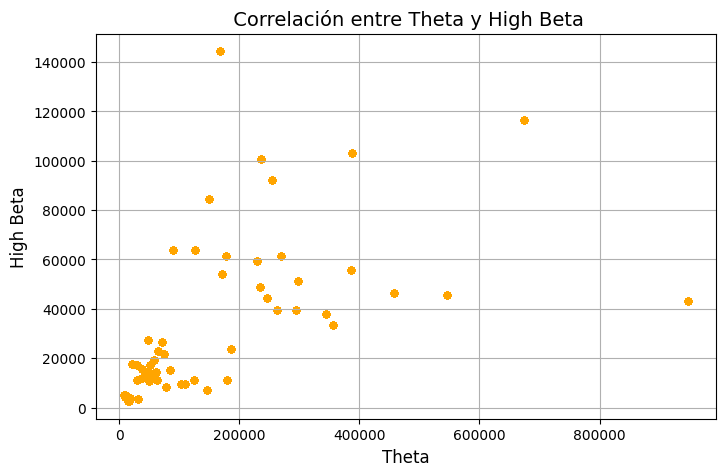

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(df_filtrado3['Theta(3.5-6.75 Hz)'], df_filtrado3['High Beta (18-29.75 Hz)'], color='orange', s=20)
plt.title(' Correlación entre Theta y High Beta', fontsize=14)
plt.xlabel('Theta', fontsize=12)
plt.ylabel('High Beta', fontsize=12)
plt.grid(True)
plt.show()

# Gráfico de dispersión Calculando la línea de regresión lineal (tendencia)

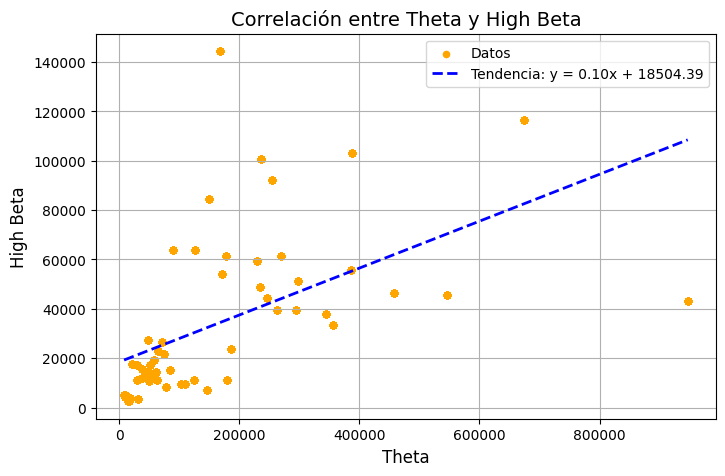

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(df_filtrado3['Theta(3.5-6.75 Hz)'], df_filtrado3['High Beta (18-29.75 Hz)'], color='orange', s=20, label='Datos')

m3, b3 = np.polyfit(df_filtrado3['Theta(3.5-6.75 Hz)'], df_filtrado3['High Beta (18-29.75 Hz)'], 1)  # 1 = grado lineal (y = mx + b)
x3_vals = np.sort(df_filtrado3['Theta(3.5-6.75 Hz)'])
y3_vals = m3 * x3_vals + b3
plt.plot(x3_vals, y3_vals, color='blue', linestyle='--', linewidth=2, label=f'Tendencia: y = {m3:.2f}x + {b3:.2f}')

# Personalización
plt.title('Correlación entre Theta y High Beta', fontsize=14)
plt.xlabel('Theta', fontsize=12)
plt.ylabel('High Beta', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Interpretacion

In [29]:
print("\n💡 Interpretación:")
if abs(r_manual3) > 0.7:
    print("Correlación fuerte (🔵 Relación lineal clara).")
elif abs(r_manual3) > 0.3:
    print("Correlación moderada (🟡 Relación parcial).")
else:
    print("Correlación débil o nula (🔴 Sin relación lineal).")


💡 Interpretación:
Correlación moderada (🟡 Relación parcial).
